In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [4]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 55826.5239
Epoch 2/400
0s - loss: 35418.8228
Epoch 3/400
0s - loss: 22815.1711
Epoch 4/400
0s - loss: 12153.0751
Epoch 5/400
0s - loss: 5317.3411
Epoch 6/400
0s - loss: 2146.4292
Epoch 7/400
0s - loss: 1237.2492
Epoch 8/400
0s - loss: 1094.4469
Epoch 9/400
0s - loss: 1072.0145
Epoch 10/400
0s - loss: 1062.6993
Epoch 11/400
0s - loss: 1049.1930
Epoch 12/400
0s - loss: 1057.4871
Epoch 13/400
0s - loss: 1052.5016
Epoch 14/400
0s - loss: 1047.0342
Epoch 15/400
0s - loss: 1045.4998
Epoch 16/400
0s - loss: 1037.4605
Epoch 17/400
0s - loss: 1044.5929
Epoch 18/400
0s - loss: 1042.2319
Epoch 19/400
0s - loss: 1078.1769
Epoch 20/400
0s - loss: 1046.8710
Epoch 21/400
0s - loss: 1031.3937
Epoch 22/400
0s - loss: 1044.6090
Epoch 23/400
0s - loss: 1058.9600
Epoch 24/400
0s - loss: 1018.4540
Epoch 25/400
0s - loss: 1012.2388
Epoch 26/400
0s - loss: 1017.0849
Epoch 27/400
0s - loss: 994.5612
Epoch 28/400
0s - loss: 1004.5457
Epoch 29/400
0s - loss: 985.3577
Epoch 30/400
0s - los

0s - loss: 517.6506
Epoch 245/400
0s - loss: 510.6990
Epoch 246/400
0s - loss: 546.1666
Epoch 247/400
0s - loss: 536.4661
Epoch 248/400
0s - loss: 531.9201
Epoch 249/400
0s - loss: 517.3223
Epoch 250/400
0s - loss: 523.3365
Epoch 251/400
0s - loss: 520.5394
Epoch 252/400
0s - loss: 530.1883
Epoch 253/400
0s - loss: 542.5370
Epoch 254/400
0s - loss: 529.4439
Epoch 255/400
0s - loss: 514.2480
Epoch 256/400
0s - loss: 525.9441
Epoch 257/400
0s - loss: 532.6826
Epoch 258/400
0s - loss: 519.8624
Epoch 259/400
0s - loss: 514.1588
Epoch 260/400
0s - loss: 537.2478
Epoch 261/400
0s - loss: 516.6840
Epoch 262/400
0s - loss: 529.9394
Epoch 263/400
0s - loss: 521.6287
Epoch 264/400
0s - loss: 514.5786
Epoch 265/400
0s - loss: 532.4723
Epoch 266/400
0s - loss: 579.7280
Epoch 267/400
0s - loss: 508.7725
Epoch 268/400
0s - loss: 537.0781
Epoch 269/400
0s - loss: 541.8010
Epoch 270/400
0s - loss: 535.0999
Epoch 271/400
0s - loss: 531.6178
Epoch 272/400
0s - loss: 530.6595
Epoch 273/400
0s - loss: 543

In [5]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 566.18 MSE (23.79 RMSE)
Test Score: 2250.80 MSE (47.44 RMSE)


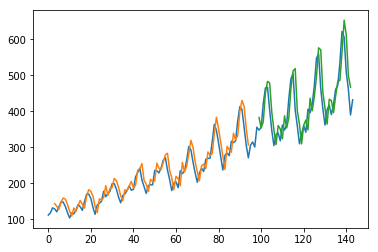

In [6]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()